In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Q1. (e)
## Realistic condition: CD varies with Mach number according to the plot shown in figure
![Cd vs mach](Cdvsmach.png)

In [10]:
def trajectory(dt):
    # initial rocket mass(kg)
    Mi = 15000
    # propellant mass(Kg)
    Mp = 12000
    # burnout mass(Kg)
    Mb = Mi - Mp
    # initial height(m)
    hi = 0
    # initial horizontal velocity(m/s)
    uxi = 0
    # initial vertical velocity(m/s)
    uyi = 30
    # initial velocity(m/s)
    ui = np.sqrt(pow(uxi,2) + pow(uyi,2))
    # equivalent velocity(m/s)
    ueq = 3048
    # initial time(sec)
    ti = 0
    # burnout time(sec)
    tb = 100
    # exhaust mass flow(Kg/s)
    mdot = -((Mb-Mi)/tb)
    # acceleration due to gravity at groung level (m/s^2)
    g0 = 9.81
    # theta from vertical
    thetai = 1*(np.pi/180)
    # earth's radius (km)
    Re = 6400
    # # frontal cross sectional area (m2)
    Af = 1
    # air specific ratio
    gama  = 1.4
    # for air gas constant (J/Kg/K)
    R = 287

    M_old = Mi
    h_old = hi
    u_old = ui
    theta_old = thetai
    t_old = ti
    ux_old = uxi
    uy_old = uyi
    x_old = 0

    M = []
    h = []
    u = []
    theta = []
    t = []
    ux = []
    uy = []
    x = []
    Drag = []
    G = []
    cD = []
    MachNum = []

    M.append(M_old)
    h.append(h_old)
    u.append(u_old)
    theta.append(theta_old)
    t.append(t_old)
    ux.append(ux_old)
    uy.append(uy_old)
    x.append(x_old)
    Drag.append(0)
    G.append(g0)

    # temprature variation with height
    def atmosTemp(h):
        # Lapse Rate
        lamda = [-6.5,0.0,1.0,2.8,0.0,-2.8,-2.0,0.0,12.0]   
        # for air gas constant (J/Kg/K)
        R = 287
        # Sea level temprature (Kelvin)
        T0 = 288.16
        # Sea level altitude (m)
        H0 = 0
        # radius of earth (m)
        r0 = 6400000

        if h <= 11:
            T = T0 + lamda[0]*(h - H0)
        elif h > 11 and h <= 20:
            T0 = 216.51671343
            H0 = 11
            T = T0 + lamda[1]*(h - H0)
        elif h > 20 and h <= 32:
            T0 = 216.51671343
            H0 = 20
            T = T0 + lamda[2]*(h-H0)
        elif h > 32 and h <= 47:
            T0 = 228.54076152
            H0 = 32
            T = T0 + lamda[3]*(h-H0)
        elif h > 47 and h <= 51:
            T0 = 270.62492986
            H0 = 47
            T = T0 + lamda[4]*(h-H0)
        elif h > 51 and h <= 71:
            T0 = 270.62492986
            H0 = 51
            T = T0 + lamda[5]*(h-H0)
        elif h > 71 and h <= 84:
            T0 = 214.51270541
            H0 = 71
            T = T0 + lamda[6]*(h-H0)
        elif h > 84 and h <= 91:
            T0 = 188.4606012
            H0 = 84
            T = T0 + lamda[7]*(h-H0)
        elif h > 91 and h <= 110:
            H0 = 91
            Tc = 263.1905
            A = -76.3232
            a = -19.9429
            T = Tc + A*(pow((1-pow(((h-H0)/a),2)),0.5))
        elif h > 110 and h <= 120:
            T0 = 240
            H0 = 110
            T = T0 + lamda[8]*(h-H0)
        elif h > 120:
            T0 = 360
            H0 = 120
            Tinf = 1000
            lam = 0.01875
            epsilon = (h-H0)*((r0 + H0)/(r0 + h))
            T = Tinf - (Tinf-T0)*np.exp(-lam*epsilon)
        return T
    
    def g(g0,Re,h):
        return pow((Re/(Re+h)),2)*g0

    # #  dendity variation with height (kg/m3)
    def rho(h):
        return 1.2*np.exp(-2.9*pow(10,-5)*pow(h,1.15))

    # Cd variation with Mach Number
    def CdVariation(Mn):
        if Mn <= 0.6:
            Cd = 0.208333*pow(Mn,2) - 0.25*Mn + 0.46
        elif Mn > 0.6 and Mn <= 0.8:
            Cd = 1.25*pow(Mn,3) - 2.125*pow(Mn,2) + 1.2*Mn + 0.16
        elif Mn > 0.8 and Mn <= 0.95:
            Cd = 10.37037*pow(Mn,3) - 22.88889*pow(Mn,2) + 16.9111*Mn - 3.78963
        elif Mn > 0.95 and Mn <= 1.05:
            Cd = -30*pow(Mn,3) + 88.5*pow(Mn,2) - 85.425*Mn + 27.51375
        elif Mn > 1.05 and Mn <= 1.15:
            Cd = -20*pow(Mn,3) + 60*pow(Mn,2) - 58.065*Mn + 19.245
        elif Mn > 1.15 and Mn <= 1.3:
            Cd = 11.85185*pow(Mn,3) - 44.88889*pow(Mn,2) + 56.22222*Mn - 22.58519
        elif Mn > 1.3 and Mn <= 2:
            Cd = -0.04373178*pow(Mn,3) + 0.3236152*pow(Mn,2) - 1.019679*Mn + 1.544752
        elif Mn > 2 and Mn <= 3.25:
            Cd = 0.01024*pow(Mn,3) - 0.00864*pow(Mn,2) - 0.33832*Mn + 1.08928
        elif Mn > 3.25 and Mn <= 4.5:
            Cd = -0.01408*pow(Mn,3) + 0.191688*pow(Mn,2) - 0.86976*Mn + 1.53544
        elif Mn > 4.5:
            Cd = 0.22
        return Cd
    # drag
    def D(Cd,Af,rho,u):
        return pow(u,2)*0.5*Cd*Af*rho(h_old)
    
        
    while t_old < tb:
        a = np.sqrt(gama*R*atmosTemp(h_old))
        Mach = u_old/a
        Cd = CdVariation(Mn=Mach)
        drag = D(Cd,Af,rho,u_old)
        gravity = g(g0,Re,h_old)
        
        du = ((mdot*ueq/M_old)- (drag/M_old) - gravity*np.cos(theta_old))*dt
       
        u_new = u_old + du

        dun = gravity*np.sin(theta_old)*dt

        dur = np.sqrt(pow(du,2)+pow(dun,2))

        dtheta = np.arctan(dun/(du + u_new))
        theta_new = theta_old + dtheta

        dux = dur*np.sin(theta_new)
        ux_new = ux_old + dux
        duy = dur*np.cos(theta_new)
        uy_new = uy_old + duy

        dx = ux_new*dt
        x_new = x_old + dx
        dy = uy_new*dt
        h_new = h_old + dy

        dm = -mdot*dt
        M_new = M_old + dm

        t_new = t_old + dt

        t.append(t_new)
        M.append(M_new)
        u.append(u_new)
        theta.append(theta_new)
        ux.append(ux_new)
        uy.append(uy_new)
        x.append(x_new)
        h.append(h_new)
        Drag.append(drag)
        G.append(gravity)
        cD.append(Cd)
        MachNum.append(Mach)

        theta_old = theta_new
        M_old = M_new
        ux_old = ux_new
        uy_old = uy_new
        u_old = u_new
        x_old = x_new
        h_old = h_new
        t_old = t_new
        
    return [x,h,u,t,theta,Drag,G,cD,MachNum]

In [11]:
[xe,he,ue,te,thetae,Drage,Ge,cDe,MachNume] = trajectory(dt= 0.01)

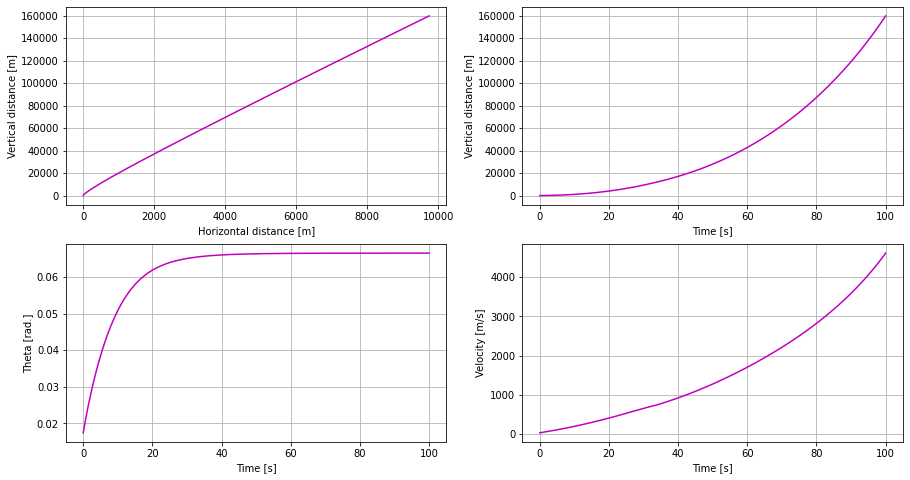

In [12]:
plt.figure(figsize=(15,8));

plt.subplot(2,2,1);plt.plot(xe,he,"-m");plt.grid();plt.xlabel("Horizontal distance [m]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,2);plt.plot(te,he,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Vertical distance [m]");
plt.subplot(2,2,3);plt.plot(te,thetae,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Theta [rad.]");
plt.subplot(2,2,4);plt.plot(te,ue,"-m");plt.grid();plt.xlabel("Time [s]");plt.ylabel("Velocity [m/s]");

# Drag and Gravity Variation

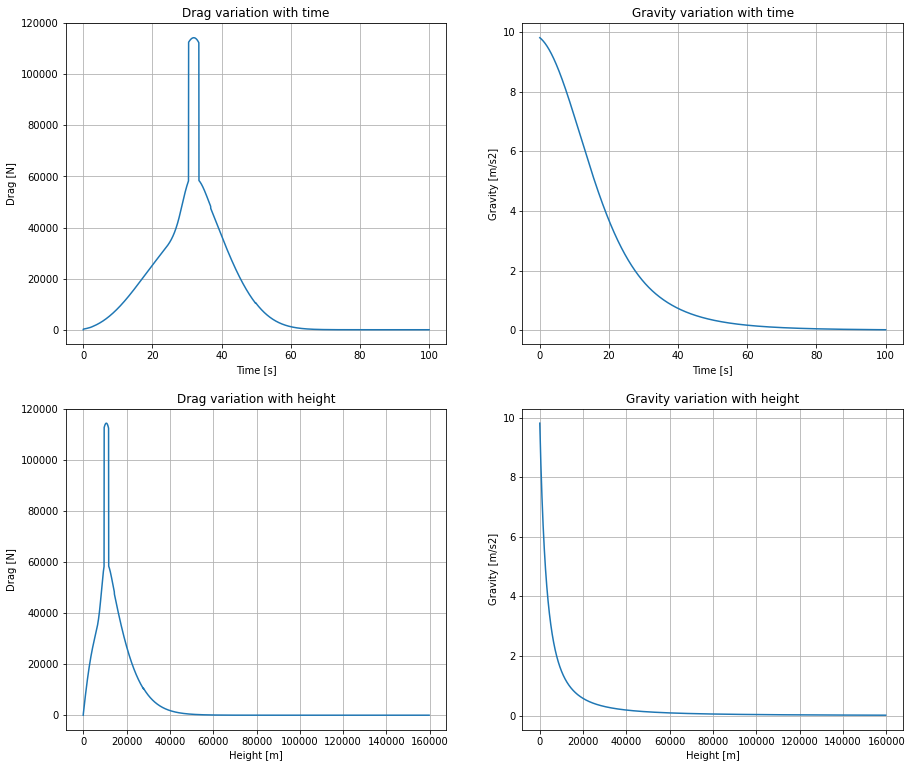

In [13]:
plt.figure(figsize=(15,13));

plt.subplot(2,2,1);
plt.title("Drag variation with time");
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Drag [N]");
plt.plot(te,Drage)

plt.subplot(2,2,2);
plt.title("Gravity variation with time");
plt.grid();
plt.xlabel("Time [s]");plt.ylabel("Gravity [m/s2]");
plt.plot(te,Ge,"-")

plt.subplot(2,2,3);
plt.title("Drag variation with height");
plt.grid();
plt.xlabel("Height [m]");plt.ylabel("Drag [N]");
plt.plot(he,Drage)

plt.subplot(2,2,4);
plt.title("Gravity variation with height");
plt.grid();
plt.xlabel("Height [m]");plt.ylabel("Gravity [m/s2]");
plt.plot(he,Ge,"-")

# Cd and Mach Number Relation

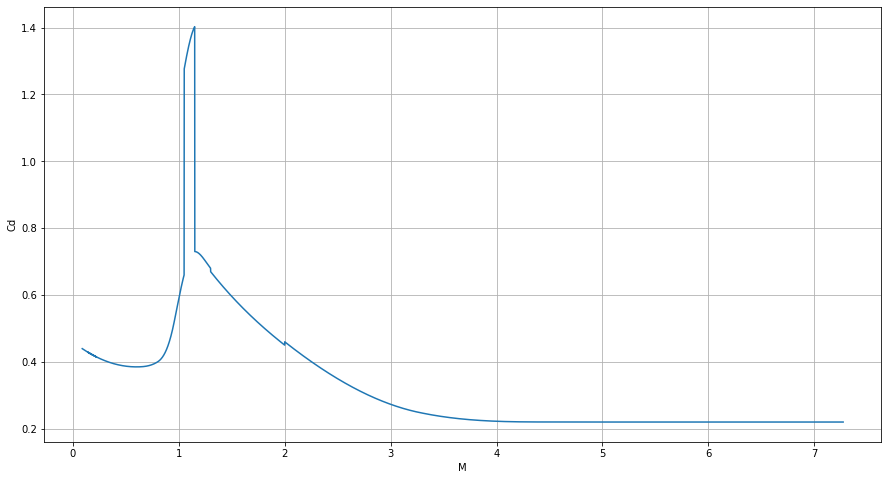

In [14]:
plt.figure(figsize=(15,8));

plt.plot(MachNume, cDe,"-");plt.grid();plt.xlabel("M");plt.ylabel("Cd");

# References

### 1. Temprature variation with altitutde
   - [1976_Std_Atm_NASA-TM-X-74335.pdf (page no. 27)](https://drive.google.com/file/d/0B-C5raHwXgyPbThFWDlwRnNVRTg/view?resourcekey=0-1Ye1B3gf289lwHop0trh9g)
### 2. Cd vs Mach Relation
   - [cd vs M graph](http://www.braeunig.us/space/aerodyn_wip.htm)